In [3]:
import pandas as pd

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

## Plan

- Some data: look at some stock price series
- devise a model for stock price series: Geometric Brownian Motion (GBM)
- Example for a contingent claim: call option
- Pricing of a call option under the assumtpion of GBM
- Challenges

## Some data: look at some stock price series

We import data from Yahoo finance: two examples are IBM and Apple

In [1]:
aapl = data.DataReader('AAPL', 'yahoo', '2000-01-01')
print(aapl.head())

NameError: name 'data' is not defined

$\Rightarrow$ various different price series

In [6]:
plt.plot(aapl.Close)

$\Longrightarrow$ There was a stock split 7:1 on 06/09/2014.
As we do not want to take care of things like that, we use the Adjusted close price!

Date
2000-01-03    3.625643
2000-01-04    3.319964
2000-01-05    3.368548
2000-01-06    3.077039
2000-01-07    3.222794
Name: Adj Close, dtype: float64


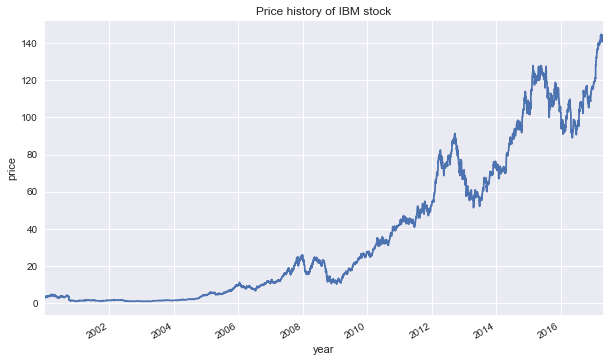

In [7]:
ibm = data.DataReader('AAPl', 'yahoo', '2000-1-1')

print(ibm['Adj Close'].head())
%matplotlib inline
ibm['Adj Close'].plot(figsize=(10,6))
plt.ylabel('price')
plt.xlabel('year')
plt.title('Price history of IBM stock')



Date
2000-01-03    87.761136
2000-01-04    84.782175
2000-01-05    87.761136
2000-01-06    86.248013
2000-01-07    85.869732
Name: Adj Close, dtype: float64


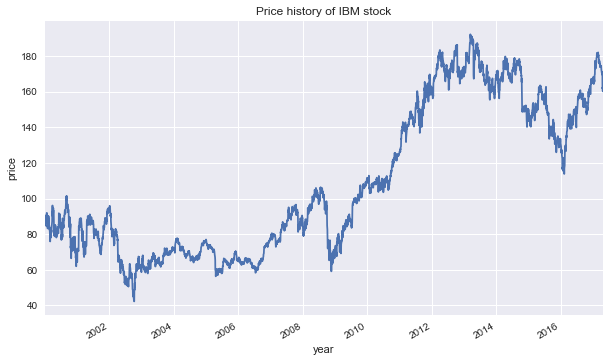

In [6]:
ibm = data.DataReader('IBM', 'yahoo', '2000-1-1')

print(ibm['Adj Close'].head())
%matplotlib inline
ibm['Adj Close'].plot(figsize=(10,6))
plt.ylabel('price')
plt.xlabel('year')
plt.title('Price history of IBM stock')


## Define new financial instruments

What we have now prices of financial instruments:
    - bonds (assume: fixed price)
    - stocks
    - exchange rates
    - oil
    - dots
$\Longrightarrow$ Tradeables with variable prices
    
We can form a portfolio by 
    - holding some cash (possibly less than 0, that's called debts)
    - buying some stock/currency etc. (perhaps less than 0, that's called 'short)

## Why do we need more ?

- you want to play
- you are producing something and you want to assure, that the prices you achieve in one year are suffiientlyone a stock, and arewant to protect yourself against lower prices
- you want to protect yourself against higher prices
- you want to protect yourself against an increase in volatility
- you want to protect yourself against extreme price movements 
- you want to ...

$\Longrightarrow$ Essentially you want to be able to control the final value of your portfolio!

You go the bank, the bank offers you some product, you buy and are happy ....°

### Obligations for the bank

- construct a product
- price the product
- hedge the product

For this talk, we take one of the easiest such products:, a call option.

## Call option

### Definition
Call option on a stock $S$ with strike price $K$ and expiry $T$: 

The buyer of the call option has the right, but not the obligation, to buy $1$ stock $S$  (the underlying) from the seller of the option at a certain time (the expiration date $T$) for a certain price (the strike price $K$).

Payoff: $$C_T =\max(0, S-K)\,.$$


### What can you do with a Call-option?

Example: you want to buy a stock next year, 01.01.2018, for 100:
Buy now a call for 100 (strike price).

Next year you can distinguish two distinct cases:

- stock trades at 80 < 100 $\Longrightarrow$  buy stock for 80 Euro, forget call option - it call is worthless
- stock trades at 120 > 100 $\Longrightarrow$ use call to buy stock for 100


### How to price the call option?

- match expectations
- utility pricing
- arbitrage free pricing $\Longrightarrow$ this is the price, enforced by the market
- ...

What is a fair price for an option with strike price $K$ and expiry $T$?
If the stock trades at a price $S$ at time $T$, then the payoff is: 

Payoff: $C_T =\max(0, S-K)\,.$

If the interest rate is $r$, we discount future cashflows with $e^{- r T}$. Thus if the stock traded at price $S$ at expire, the resulting cash-flow would be worth(time $t = 0$)
$$C_0 = e^{- r T} \max(0, S-K)\,.$$

Problem: we do not know $S_T$ at time $0$.

Solution: we take the expectation of $S$. This yields

$$C_{0, S} = e^{- r T} \mathbb{E}\left[ \max(0, S-K)\right]\,.$$

Caveat: We have hidden a lot!!
The formal deduction is complicated via arbitrage free pricing and the Feynmann-Kac-theorem

How to constructthe expectation? Need a model for the stock price!

## Construct a theoretical model for stock price movements: Geometric Brownian motion

For the apple chart one can see, that price increments seem to correlate with the price: thus we plot logarithmic prices:

Let us plot the data logarithmically:

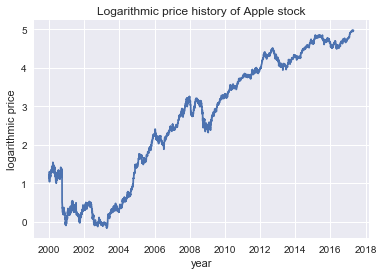

In [9]:
Log_Data = plt.figure()
%matplotlib inline
plt.plot(np.log(aapl['Adj Close']))
plt.ylabel('logarithmic price')
plt.xlabel('year')
plt.title('Logarithmic price history of Apple stock')

Now the roughness of the chart looks more even $\Rightarrow$ We should model increments proportional to the stock price!

This leads us to some assumptions for the stock price process: 
- the distribution of relative changes is constant over time
- Small changes appear often, large changes rarly: changes are normally distributed

 $\Rightarrow$ use an exponential Gaussian distribution for increments:
 $$S_{n+1} = S_n e^{\sigma X+ \mu} $$
 where $X \sim N(0,1)$, $\sigma$ denotes the variance and $\mu$ the mean growth rate.

Let us simulate this: 
typical values for $\mu$ and $\sigma$ per year are:
- $\mu_y= 0,08$
- $\sigma_y = 0.2$

$\Rightarrow$ assuming 252 business days a year we get
$$\mu = \mu_d = \frac{\mu_y}{252}\sim 0.0003$$
$$\sigma = \sigma_d = \frac{\sigma_y}{\sqrt{252}}\sim 0,012$$

In [10]:
S0 = 1
sigma = 0.2/np.sqrt(252)
mu = 0.08/252

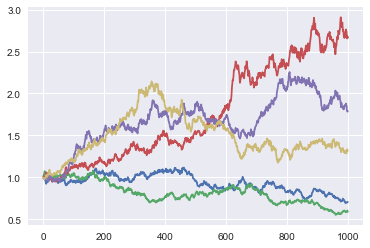

In [11]:
%matplotlib inline
for i in range(0, 5):
    r = np.random.randn((1000))
    plt.plot(S0 * np.cumprod(np.exp(sigma *r +mu)))

In [12]:
S0 = 1.5                    # start price
K = 1.0                     # strike price
mu = 0                      # average growth
sigma = 0.2/np.sqrt(252)    # volatility
N = 10000                   # runs
M = 252*4                   # length of each run (252 business days per year times 4 years)

In [13]:
def call_price(S, K):
    return max(0.0, S-K)

In [ ]:
def MC_call_price(S0, K, mu, sigma, N, M):
    CSum = 0
    SSum = 0
    for n in range(N):
        r = np.random.randn((M))
        S =  S0 * np.cumprod(np.exp(sigma *r))
        SSum += S
        CSum += call_price(S[M-1], K)
    return CSum/N


### Optionprices:

In [ ]:
S0 = np.linspace(0.0, 2.0,21)
C = []
for k in range(21):
    C.append(MC_call_price(k*2/20, K, mu, sigma, N, M))
C

In [ ]:
plt.plot(S0, C)
plt.ylabel('Call price')
plt.xlabel('Start price')
plt.title('Call price')
plt.show()

This curve can also be calculated theoretically. Using stochastic calculus, one can deduce the famous Black-Scholes equation, to calculate this curve. We will not go into detail ...

In [ ]:
from IPython.display import Image
Image("Picture_Then_Miracle_Occurs.PNG")

... but will just state the final result!

## Black Scholes formula:

$${\displaystyle d_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q+{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$${\displaystyle d_{2}=d_{1}-\sigma {\sqrt {T-t}}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q-{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

Black-Scholes Formula for the call price:

$${\displaystyle C(S_{t},t)=e^{-r(T-t)}[S_tN(d_{1})-KN(d_{2})]\,}$$

$\Delta$ describes the change in the price of the option if the stock price changes by $1$.

Black Scholes formula for the Delta:

$$ \Delta(C, t) = e^{-r(T-t)} N(d_1)$$

In [ ]:
d_1 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) + 0.5 * (σ ** 2) * (T-t))
d_2 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) - 0.5 * (σ ** 2) * (T-t))

call = lambda σ, T, t, S, K: S * sp.stats.norm.cdf( d_1(σ, T, t, S, K) ) - K * sp.stats.norm.cdf( d_2(σ, T, t, S, K) )
Delta = lambda σ, T, t, S, K: sp.stats.norm.cdf( d_1(σ, T, t, S, K) )

In [ ]:
plt.plot(np.linspace(sigma, 4., 100), call(1., 1., .9, np.linspace(0.1, 4., 100), 1.))

In [ ]:
plt.plot(d_1(1., 1., 0., np.linspace(0.1, 2.9, 10), 1))

In [ ]:
#plt.plot(np.linspace(sigma, 4., 100), Delta(1., 1.,  .9, np.linspace(0.1,   4., 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.2, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.6, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.99, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9999, np.linspace(0.01, 1.9, 100), 1.))
plt.xlabel("Price/strike price")
plt.ylabel("$\Delta$")
plt.legend(['t = 0.2','t = 0.6', 't = 0.9', 't = 0.99', 't = 0.9999'], loc  = 2)

For small prices we do not need to own shares, to hedge the option. For high prices we need exactly one share. The interesting area is around the strike price.

Simulate a portfolio consisting of 1 call option and $-\Delta$ Shares:
$$P = C - \Delta S$$
In approximation, the portfolio value should be constant!

In [ ]:
N = 10 #runs

In [ ]:
def Simulate_Price_Series(S0, sigma, N, M):
    for n in (1,N):
        r = np.random.randn((M))
        S =  S0 * np.cumprod(np.exp(sigma *r))
     
        for m in (1,M):
            P.append = Delta(sigma, M, m, S, K)*
            
    return S

In [ ]:
plt.plot(1+np.cumsum(np.diff(S) * Delta(sigma, 4, 0, S, K)[1, M-1]))
plt.plot(S)

In [ ]:
S


In [ ]:
len(Delta(sigma, 4, 0, S, K)[[1:999]])


In [ ]:
def Calculate_Portfolio(S0, K, mu, sigma, N, M):
    S = Simulate_Price_Series(S0, sigma, N, M)
    StockDelta = Delta(sigma, 4, 0, S, K) )
    vol = vol0 * np.cumprod(np.exp(sigma*r2)
    S =  S0 * np.cumprod(np.exp(vol * r))
    SSum += S
    CSum += call_price(S[M-1], K)

## Challenges

- 1) the price depends on the calibration of $\sigma$! Parameters may not be constant over time!
- 2) the price depends on the validity of the model

The main problem is the second one:

A)  
$\sigma$ and $\mu$ may change over time. Hence changes of volatility should adapted in the price
$\Longrightarrow$ new more complex models describing stochastic volatility are introduced, for example: 
- Heston model, 
- Ball-Roma model, 
- SABR-model and many more

B)
let us look at the log-returns:

In [ ]:
np.histogram(np.diff(aapl['Adj Close']))

plt.hist(np.diff(aapl['Adj Close']), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of daily returns for Apple")
plt.show()

This is not a normal distribution!

2) normally distributed increments are not realistic. Real distributions are
- Heavy tails:
- Gain/Loss asymmetry 
- Aggregational Gaussianity
- Intermittency (parameter changes over time)
- Volatility clustering
- Leverage effect
- Volume/volatility correlation:
- Slow decay of autocorrelation in absolute returns:
- Asymmetry in time scales

(see for example: Rama Cont: Empirical properties of asset returns: stylized facts and statistical issues, Journal of quantitative finance, Volume 1 (2001) 223–236)


The option price depends on the model, on the calibration.

## Alternative model: Local volatility model

The closest alternative to the Black-Scholes model are local volatility models.

In [ ]:
def MC_call_price_Loc_Vol(S0, K, mu, sigma, N, M):
    CSum = 0
    SSum = 0
    for n in range(N):
        r = np.random.randn((M))
        r2 = np.random.randn((M))
        vol = vol0 * np.cumprod(np.exp(sigma*r2)
        S =  S0 * np.cumprod(np.exp(vol * r))
        SSum += S
        CSum += call_price(S[M-1], K)
    return CSum/N

In [ ]:
S0 = np.linspace(0.0, 2.0,21)
CLoc = []
for k in range(21):
    CLoc.append(MC_call_price_Loc_Vol(k*2/20, K, mu, 0.1*sigma, N, M))
  

In [ ]:
CLoc

In [ ]:
plt.plot(S0, C)
plt.plot(S0, CLoc)
plt.ylabel('Call price')
plt.xlabel('Start price')
plt.title('Call price')
plt.show()

## Proposed solution

Find a way to price an option without the assumption of a market model, without the need to calibrate and recalibrate the model.

In [ ]:
def iterate_series(n=1000, S0 = 1):
    while True:
        r = np.random.randn((n))
        S = np.cumsum(r) + S0
        yield S, r

In [ ]:
for (s, r) in iterate_series():
    t, t_0 = 0, 0
    for t in np.linspace(0, len(s)-1, 100):
        r = s[int(t)] / s[int(t_0)]
        t_0 = t
    break

In [ ]:
state = (stock_val, besitz)